In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("Position_Salaries.csv")
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [8]:
X = data.iloc[:,1:-1].values
y = data.iloc[:,-1:].values

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [11]:
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [12]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [13]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [16]:
from sklearn.svm import SVR
reg = SVR(kernel='rbf')
reg.fit(X,y)

C:\Users\sahil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [18]:
sc_y.inverse_transform(reg.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

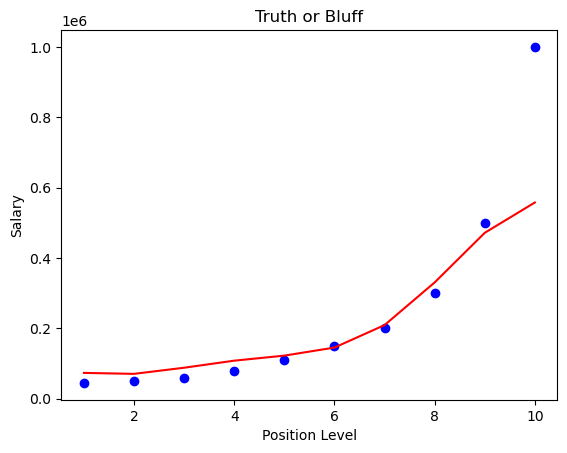

In [26]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='blue')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(reg.predict(X).reshape(-1,1)), color='red')
plt.title("Truth or Bluff")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()
